# Lesson 9. On Your Own: A Full Workflow
Now is your chance to pull everything we've learned together and answer the questions: 
- How many polling stations are in each census tract in Alameda County?
- Which polling stations are within walking distance (100m) from a bus route in Berkeley?
- How far are these polling stations from the bus routes in Berkeley?

**All on your own!!**

- 9.1 Polling Station Locations
- 9.2 Tracts data 
- 9.3 Spatial Join 
- 9.4 Aggregate number of stations by census tracts
- 9.5 Attribute join back to tracts data
- 9.6 Berkeley outline
- 9.7 Bus routes
- 9.8 Polling station distance from bus routes

*We've written out some of the code for you, and you can check your answers by clicking on the toggle solution button*
 
### Install Packages

In [6]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# get the solution hider
from solution_hider import hide_solution

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 9.1 Polling Station Locations

We'll be using the 2020 General Election voting locations for Alameda County for this analysis. Since the data is *aspatial* we'll need to coerce it to be a geodataframe and define a CRS.

- read our grocery-data CSV into a Pandas DataFrame (it lives at `'notebook_data/ac_voting_locations.csv`)
- coerce it to a GeoDataFrame
- define its CRS (EPSG:4326)
- plot it

In [3]:
# Pull in polling location

# polling_ac_df = pd.read_csv(...)
# polling_ac_df.head()

In [4]:
# Make into geo data frame

# polling_ac_gdf = gpd.GeoDataFrame(..., 
#                                geometry=gpd.points_from_xy(...,...))
# polling_ac_gdf.crs = ...

# plot it 

# polling_ac_gdf.plot(...)


## Double-click here to see solution!

<!--
#SOLUTION:
# Pull in polling location
polling_ac_df = pd.read_csv('notebook_data/ac_voting_locations.csv')
polling_ac_df.head()

# Make into geo data frame
polling_ac_gdf = gpd.GeoDataFrame(polling_ac_df, 
                               geometry=gpd.points_from_xy(polling_ac_df.X, polling_ac_df.Y))
polling_ac_gdf.crs = "epsg:4326"

polling_ac_gdf.plot()

-->

## 9.2 Tracts data

Since we want to answer the question **How many polling stations are in each census tract?**, we'll pull in our tracts data.

- Bring in the census tracts data which lives at `notebook_data/census/Tracts/cb_2013_06_tract_500k.zip`
- Narrow it down to Alameda County
- Check CRS
- Transform CRS to 26910 if needed


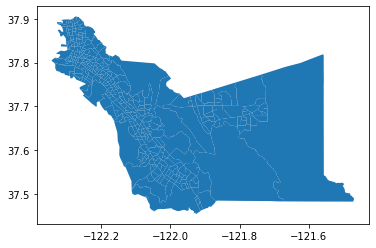

In [4]:
# Bring in census tracts
# tracts_gdf = gpd.read_file(...)

# Narrow it down to Alameda County
# tracts_gdf_ac = tracts_gdf[...]
# tracts_gdf_ac.plot()
# plt.show()

In [5]:
# Check CRS
print('polling_ac_gdf:', ...)
print('tracts_gdf_ac CRS:', ...)

polling_ac_gdf: epsg:4326
tracts_gdf_ac CRS: epsg:4269


In [9]:
# Transform CRS
polling_ac_gdf_utm10 = ...
tracts_gdf_ac_utm10 = ...

## Double-click here to see solution!

<!--
#SOLUTION:

# Bring in census tracts
tracts_gdf = gpd.read_file("zip://notebook_data/census/Tracts/cb_2013_06_tract_500k.zip")

# Narrow it down to Alameda County
tracts_gdf_ac = tracts_gdf[tracts_gdf['COUNTYFP']=='001']
tracts_gdf_ac.plot()
plt.show()

# Check CRS
print('polling_ac_gdf:', polling_ac_gdf.crs)
print('tracts_gdf_ac CRS:', tracts_gdf_ac.crs)

# Transform CRS
polling_ac_gdf_utm10 = polling_ac_gdf.to_crs("epsg:26910")
tracts_gdf_ac_utm10 = tracts_gdf_ac.to_crs("epsg:26910")

-->

# 9.3 Spatial Join

Alright, now our data is all ready to go! We're going to do a *spatial join* to answer our question about polling stations in each tract.

- Spatial join tracts/acs with the polling data (keep the tracts geometry!)
- Plot it to make sure you have the right geometry
- Check out your data and its dimensions

In [12]:
# Spatial join tracts/acs with the polling data (keep the tracts geometry!)

# polls_jointracts = gpd.sjoin(..., ... , how=...)

In [13]:
# Plot it to make sure you have the right geometry

# polls_jointracts.plot()

In [14]:
# Check out your data and its dimensions


## Double-click here to see solution!

<!--
#SOLUTION:

# Spatial join tracts/acs with the polling data (keep the tracts geometry!)
polls_jointracts = gpd.sjoin(tracts_gdf_ac_utm10, polling_ac_gdf_utm10, how='left')

# Plot it to make sure you have the right geometry
polls_jointracts.plot()

# Check out your data and its dimensions
print(polls_jointracts.shape)
polls_jointracts.head()

-->

## 9.4 Aggregate number of stations by census tracts

Now that we have a GeoDataFrame with all our polling and tract data, we'll need to *aggregate* to actually count the number of stations we have

- Use `dissolve` to count the number of polls we have
- Create a choropleth map base don the number of stations there are

In [17]:
# Use `dissolve` to count the number of polls we have

# polls_countsbytract = polls_jointracts[['TRACTCE', 'NAME_right', 
#                                         'geometry']].dissolve(by=..., 
#                                                               aggfunc=...).reset_index()
# polls_countsbytract.head()

,TRACTCE,geometry,NAME_right
0,400100,"POLYGON ((566221.610 4193371.510, 566659.969 4...",1
1,400200,"POLYGON ((565335.837 4188666.188, 565441.159 4...",0
2,400300,"POLYGON ((564744.993 4188317.651, 564946.532 4...",0
3,400400,"POLYGON ((564950.988 4188518.225, 564992.933 4...",0
4,400500,"POLYGON ((564276.448 4189213.844, 564317.359 4...",0


In [18]:
# rename the column to be for the number of polling stations (you dont have to change anything here)

# polls_countsbytract.rename(columns={'NAME_right': 'Num_Polling'}, inplace=True)

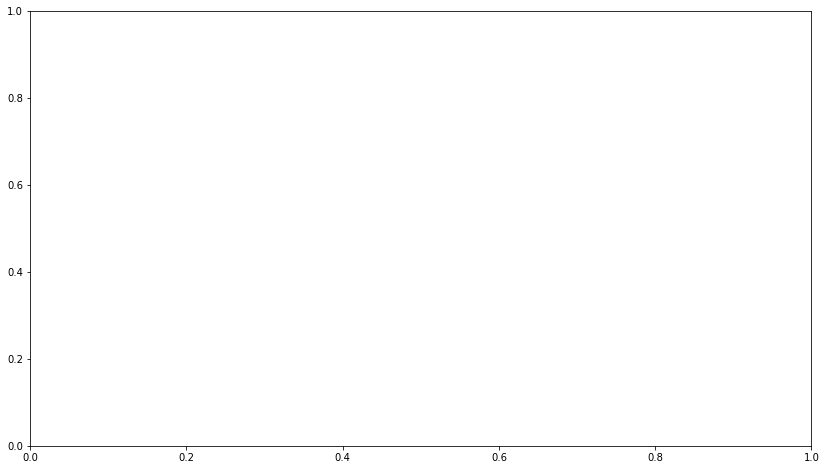

In [20]:
# Create a choropleth map base don the number of stations there are
fig, ax = plt.subplots(figsize = (14,8)) 

# polls_countsbytract.plot(ax=ax,
#                          column=..., 
#                          cmap=...,
#                          edgecolor="grey",
#                          legend=True)

# polling_ac_gdf_utm10.plot(ax=ax, color=..., edgecolor=..., markersize= ...)

## Double-click here to see solution!

<!--
#SOLUTION:

# Use `dissolve` to count the number of polls we have
polls_countsbytract = polls_jointracts[['TRACTCE', 'NAME_right', 'geometry']].dissolve(by='TRACTCE', aggfunc='count').reset_index()
polls_countsbytract.head()

# rename the column to be for the number of polling stations
polls_countsbytract.rename(columns={'NAME_right': 'Num_Polling'}, inplace=True)

# Create a choropleth map base don the number of stations there are
fig, ax = plt.subplots(figsize = (14,8)) 

polls_countsbytract.plot(ax=ax,column='Num_Polling', 
                         cmap="YlGn",
                         edgecolor="grey",
                         legend=True)
polling_ac_gdf_utm10.plot(ax=ax, color='orange', edgecolor='black', markersize=3)

-->

## 9.5 Attribute join back to tracts data

Amazing! Now that we have this information let's do an *attribute join* to add this data into our tracts data

In [24]:
# merge onto census tract data

# tracts_gdf_ac =  tracts_gdf_ac.merge(polls_countsbytract[['TRACTCE', 'Num_Polling']], left_on= ...,right_on= ... , how= ... ) 
# tracts_gdf_ac.head()

## Double-click here to see solution!

<!--
#SOLUTION:

# merge onto census tract data
tracts_gdf_ac =  tracts_gdf_ac.merge(polls_countsbytract[['TRACTCE', 'Num_Polling']], left_on='TRACTCE',right_on="TRACTCE", how='inner') 
tracts_gdf_ac.head()

-->

## 9.6 Berkeley outline

To answer our question *Which polling stations are within walking distance (100m) from a bus route in Berkeley?* we'll need to know where Berkeley is! This is the perfect time to bring our Berkeley places data in.

- Read in `outdata/berkeley_places.shp`
- Check the CRS
- Transform CRS if necessary to EPSG:26910

In [28]:
# Read in outdata/berkeley_places.shp
# berkeley_places = gpd.read_file(...)

# Check the CRS


# Transform CRS if necessary to EPSG:26910
berkeley_places_utm10 = ...

## Double-click here to see solution!

<!--
#SOLUTION:

berkeley_places = gpd.read_file("outdata/berkeley_places.shp")
berkeley_places.crs
berkeley_places_utm10 = berkeley_places.to_crs("epsg:26910")

-->


## 8.7 Bus routes

- Bring in bus routes ('notebook_data/transportation/Fall20Routeshape.zip'), transform CRS to 26910
- Intersect bus routes with Berkeley
- Plot results of intersection
- Clip bus routes to everything that is inside the berkley outline
- Plot bus routes on top of Berkeley outline

In [47]:
# Bring in bus routes, transform CRS to 26910
bus_routes = ...
# bus_routes_utm10 = bus_routes.to_crs(...)
# bus_routes_utm10.head()

In [48]:
# Look at intersection between bus routes and Berkeley
# bus_routes_berkeley = .intersects(... .geometry.squeeze())

# Create new geodataframe from these results
# bus_berk = bus_routes_utm10.loc[bus_routes_berkeley].reset_index(drop=True)

In [50]:
# Plot results of intersection

# fig, ax = plt.subplots(figsize=(10,10))
# berkeley_places_utm10.plot(ax=ax)
# bus_berk.plot(ax=ax, column ='PUB_RTE')

In [51]:
# BONUS: Look at route length
# bus_berk.length

In [52]:
# Clip bus routes to everything that is inside the berkley outline
# bus_berk_clip = gpd.clip(...,...)

In [53]:
# Plot bus routes on top of Berkeley outline
# fig, ax = plt.subplots(figsize=(10,10))
# berkeley_places_utm10.plot(ax=ax)
# bus_berk_clip.plot(ax=ax, column ='PUB_RTE')

## Double-click here to see solution!

<!--
#SOLUTION:

# Bring in bus routes, transform CRS to 26910
bus_routes = gpd.read_file('zip://notebook_data/transportation/Fall20Routeshape.zip')
bus_routes_utm10 = bus_routes.to_crs("epsg:26910")
bus_routes_utm10.head()

# Look at intersection between bus routes and Berkeley
bus_routes_berkeley = bus_routes_utm10.intersects(berkeley_places_utm10.geometry.squeeze())

# Plot results of intersection
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(ax=ax)
bus_routes_utm10.loc[bus_routes_berkeley].plot(ax=ax, column ='PUB_RTE')

bus_berk = bus_routes_utm10.loc[bus_routes_berkeley].reset_index(drop=True)

bus_berk.length

# Clip bus routes to everything that is inside the berkley outline
bus_berk_clip = gpd.clip(bus_berk,berkeley_places_utm10)

# Plot bus routes on top of Berkeley outline
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(ax=ax)
bus_berk_clip.plot(ax=ax, column ='PUB_RTE')

-->

## 8.6 Polling stations within walking distance of bus routes

Now we can really answer the question *Which polling stations are within walking distance (100m) from a bus route in Berkeley?* 

- Create buffer around bus route for 100m
- Intersect polling locations in Alameda County with Berkeley outline 
- Plot Berkeley outline, bus routes, the bus routes buffer, and polling locations
- Calculate the distance from polling stations to the closest bus route

In [38]:
# Create buffer around bus route for 100m
# bus_berk_buf =bus_berk_clip.buffer(distance= ...)

In [40]:
# Intersect polling locations in Alameda County with Berkeley outline
# polling_berk =  ... .intersects(berkeley_places_utm10.geometry.squeeze())

# polling_berk_gdf = polling_ac_gdf_utm10[polling_berk].reset_index(drop=True)

In [54]:
# Plot Berkeley outline, bus routes, the bus routes buffer, and polling locations

# fig, ax = plt.subplots(figsize=(10,10))
# berkeley_places_utm10.plot(ax=ax)
# bus_berk_buf.plot(color='pink', ax=ax, alpha=0.5)
# bus_berk_clip.plot(ax=ax, column ='PUB_RTE')
# polling_berk_gdf.plot(ax=ax, color= 'yellow')

In [ ]:
# Calculate the distance from polling stations to the closest bus route


## Double-click here to see solution!

<!--
#SOLUTION:

bus_berk_buf =bus_berk_clip.buffer(distance=100)

polling_berk = polling_ac_gdf_utm10.intersects(berkeley_places_utm10.geometry.squeeze())

polling_berk_gdf = polling_ac_gdf_utm10[polling_berk].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(ax=ax)
bus_berk_buf.plot(color='pink', ax=ax, alpha=0.5)
bus_berk_clip.plot(ax=ax, column ='PUB_RTE')
polling_berk_gdf.plot(ax=ax, color= 'yellow')


polling_berk_gdf.distance(bus_berk_clip.unary_union)

-->

# You're done!!!! 
<img src="https://pbs.twimg.com/media/EIEHbKvXUAATXhi?format=jpg&name=large">

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


